In [29]:
pip install numpy pandas matplotlib scikit-learn 

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
df=pd.read_csv('data.csv')
df.head(10)

,Type,land Mark,Bathroom,categoryName,price,Bedroom,Floor,Kitchen,Living Room,name,location/locationDescription,location/locationLatitude,location/locationLongitude
0,HouseIndividual,NaN,3,For Rent - House,168000,7,2.5,1,2,"Nearby Baluwatar, 7BHK House for rent","Baluwatar-4, Kathmandu-4, Kathmandu",27.730610,85.331062
1,Land - Individual,NaN,NaN,For Sale - Land,8500000,NaN,NaN,NaN,NaN,"Land on sale at Jhamshikhel,Bhanimandal",Location,27.716911,85.331245
2,Bunglow,NaN,4,For Rent - House,150000,5,2,1,1,"Bungalow For Rent!!\n 📍Budhanilkantha ,Kathmandu","Budhanilkantha, Kathmandu",27.765400,85.365303
3,House In a Colony,NaN,3,For Rent - House,72000,4,2,1,1,"House For Rent \n📍Swayambhu,Kathmandu","Swoyambhu, Kathmandu",27.714899,85.290298
4,Land - Individual,NaN,NaN,For Rent - Land,65000,NaN,NaN,NaN,NaN,Land on rent at Maharajgaunj Ring road,Location,27.788683,85.369499
5,Apartment Building,NaN,4,For Rent - Flat & Apartment,95000,4,2,NaN,1,Duplex 4BHK Flat For Rent!!,"Dillibazar, Kathmandu",27.705400,85.326698
6,Bunglow,NaN,4,For Rent - House,220000,6,2,4,4,"Bungalow For Rent \n📍Baluwatar,Kathmandu","Baluwatar, Kathmandu",27.725500,85.329803
7,HouseIndividual,NaN,1,For Rent - Flat & Apartment,27000,2,2,NaN,1,2bhk flat in mandikhatar,Mandikhatar Hight,27.737999,85.348152
8,Bunglow,NaN,5,For Rent - House,150000,5,2,1,1,"Bungalow For Rent \n📍Bansbari,Kathmandu","Bansbari, Kathmandu",27.742800,85.343300
9,HouseSemiCommercial,NaN,1,For Rent - Office Space,75000,NaN,2,NaN,NaN,"Bishalnagar (Baluwatar), Office Space for Rent","Bishalnagar, Tamakoshi marga, Bishalnagar, Kat...",27.722982,85.333687


In [32]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Type                          1001 non-null   object 
 1   land Mark                     3 non-null      object 
 2   Bathroom                      736 non-null    object 
 3   categoryName                  1008 non-null   object 
 4   price                         1008 non-null   int64  
 5   Bedroom                       728 non-null    object 
 6   Floor                         795 non-null    object 
 7   Kitchen                       508 non-null    object 
 8   Living Room                   726 non-null    object 
 9   name                          1008 non-null   object 
 10  location/locationDescription  1008 non-null   object 
 11  location/locationLatitude     1008 non-null   float64
 12  location/locationLongitude    1008 non-null   float64
dtypes: 

,price,location/locationLatitude,location/locationLongitude
count,1.008000e+03,1.008000e+03,1008.000000
mean,1.638279e+07,2.613773e+01,80.276392
std,3.151455e+07,6.768810e+00,20.109146
min,1.000000e+01,-2.544444e-14,0.000000
25%,6.499975e+04,2.768286e+01,85.315475
50%,4.500000e+05,2.771720e+01,85.323997
75%,2.750000e+07,2.771720e+01,85.329903
max,3.520000e+08,8.531255e+01,87.844872


In [33]:
df.shape

(1008, 13)

In [34]:
df.drop_duplicates(inplace=True)

In [35]:
df.shape

(953, 13)

In [36]:
df.drop(columns=['land Mark', 'Kitchen', 'location/locationLatitude', 'location/locationLongitude', 'Floor'], inplace=True)

In [37]:
df = df[df['categoryName'] == 'For Rent - Flat & Apartment']
df = df[df['location/locationDescription'].str.contains('Kathmandu', case=False, na=False)]


In [38]:
print (df.isnull().sum())

Type                            0
Bathroom                        0
categoryName                    0
price                           0
Bedroom                         0
Living Room                     0
name                            0
location/locationDescription    0
dtype: int64


In [39]:
df.dtypes


Type                            object
Bathroom                        object
categoryName                    object
price                            int64
Bedroom                         object
Living Room                     object
name                            object
location/locationDescription    object
dtype: object

In [40]:
df.head()

,Type,Bathroom,categoryName,price,Bedroom,Living Room,name,location/locationDescription
5,Apartment Building,4,For Rent - Flat & Apartment,95000,4,1,Duplex 4BHK Flat For Rent!!,"Dillibazar, Kathmandu"
20,HouseIndividual,1,For Rent - Flat & Apartment,28000,2,1,1 Flat rent on baluwatar,"Baluwatar Cricket Club, Kathmandu-2, Kathmandu"
23,HouseIndividual,1,For Rent - Flat & Apartment,25000,2,1,"2BHK Flat Rent in Dhapasi, Basundhara, Kathmandu","Dhapasi, Tokha-6, Kathmandu"
27,House - Individual,1,For Rent - Flat & Apartment,30000,2,1,Flat On rent At Chundevi Maharajgunj,"165, Indramaya Marg, Chundevi, Chappal Karkhan..."
78,HouseIndividual,4,For Rent - Flat & Apartment,140000,4,1,📍BUDHANILKANTHA DEUBA NIWAS AREA 4 BHK HOUSE RENT,"Budhanilkantha, Budhanilakantha-8, Kathmandu"


In [ ]:
for col in ['Bathroom', 'Bedroom', 'Living Room']:
    df[col] = df[col].astype(str)           
    df[col] = df[col].str.extract(r'(\d+)')  
    df[col] = pd.to_numeric(df[col], errors='coerce') 
    df[col] = df[col].fillna(df[col].median())     
    

In [42]:

df.head(10)

,Type,Bathroom,categoryName,price,Bedroom,Living Room,name,location/locationDescription
5,Apartment Building,4.0,For Rent - Flat & Apartment,95000,4.0,1.0,Duplex 4BHK Flat For Rent!!,"Dillibazar, Kathmandu"
20,HouseIndividual,1.0,For Rent - Flat & Apartment,28000,2.0,1.0,1 Flat rent on baluwatar,"Baluwatar Cricket Club, Kathmandu-2, Kathmandu"
23,HouseIndividual,1.0,For Rent - Flat & Apartment,25000,2.0,1.0,"2BHK Flat Rent in Dhapasi, Basundhara, Kathmandu","Dhapasi, Tokha-6, Kathmandu"
27,House - Individual,1.0,For Rent - Flat & Apartment,30000,2.0,1.0,Flat On rent At Chundevi Maharajgunj,"165, Indramaya Marg, Chundevi, Chappal Karkhan..."
78,HouseIndividual,4.0,For Rent - Flat & Apartment,140000,4.0,1.0,📍BUDHANILKANTHA DEUBA NIWAS AREA 4 BHK HOUSE RENT,"Budhanilkantha, Budhanilakantha-8, Kathmandu"
79,ApartmentBuilding,1.0,For Rent - Flat & Apartment,165000,1.0,1.0,"MAHARAJGUNJ, 1 BHK FURNISHED APARTMENT FOR RENT","Maharajgunj, Maharajganj Sadak, Kathmandu-3, K..."
84,HouseIndividual,1.0,For Rent - Flat & Apartment,20500,1.0,1.0,2BHK flat for rent Manamaiju,"Tarakeshwor-4, Kathmandu, Bagmati Pradesh"
88,HouseIndividual,1.0,For Rent - Flat & Apartment,35000,4.0,0.0,"4BKD Flat Rent in Sitapaila, Kalanki, Kathmandu","Sitapaila Kirana, Kathmandu-13, Kathmandu"
89,HouseIndividual,1.0,For Rent - Flat & Apartment,30000,2.0,0.0,Semi furnished Flat rent at Baneshor Kathmandu,"Baneshwor Banquet, Saraswati Marg, Kathmandu-1..."
95,House - Individual,1.0,For Rent - Flat & Apartment,15000,1.0,1.0,2 Room For Rent,"Aakashedhara, Budhanilkantha Municipality, Kat..."


In [43]:
df['Area'] = df['Bedroom']*120 + df['Bathroom']*40 + df['Living Room']*150

In [44]:
df['price'].dtype
df['price'].isnull().sum()
df = df.dropna(subset=['price'])


In [ ]:
df = df[df['price'] > 0] 

In [46]:
df.head()

,Type,Bathroom,categoryName,price,Bedroom,Living Room,name,location/locationDescription,Area
5,Apartment Building,4.0,For Rent - Flat & Apartment,95000,4.0,1.0,Duplex 4BHK Flat For Rent!!,"Dillibazar, Kathmandu",790.0
20,HouseIndividual,1.0,For Rent - Flat & Apartment,28000,2.0,1.0,1 Flat rent on baluwatar,"Baluwatar Cricket Club, Kathmandu-2, Kathmandu",430.0
23,HouseIndividual,1.0,For Rent - Flat & Apartment,25000,2.0,1.0,"2BHK Flat Rent in Dhapasi, Basundhara, Kathmandu","Dhapasi, Tokha-6, Kathmandu",430.0
27,House - Individual,1.0,For Rent - Flat & Apartment,30000,2.0,1.0,Flat On rent At Chundevi Maharajgunj,"165, Indramaya Marg, Chundevi, Chappal Karkhan...",430.0
78,HouseIndividual,4.0,For Rent - Flat & Apartment,140000,4.0,1.0,📍BUDHANILKANTHA DEUBA NIWAS AREA 4 BHK HOUSE RENT,"Budhanilkantha, Budhanilakantha-8, Kathmandu",790.0


In [47]:
df[['Bedroom', 'Bathroom', 'Living Room', 'Area', 'price']].head()

,Bedroom,Bathroom,Living Room,Area,price
5,4.0,4.0,1.0,790.0,95000
20,2.0,1.0,1.0,430.0,28000
23,2.0,1.0,1.0,430.0,25000
27,2.0,1.0,1.0,430.0,30000
78,4.0,4.0,1.0,790.0,140000


In [ ]:
X = df[['Area']]   
y = df['price']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [51]:
y_pred = model.predict(X_test)

In [52]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 1519866187.524008
R² Score: 0.36874943755994305


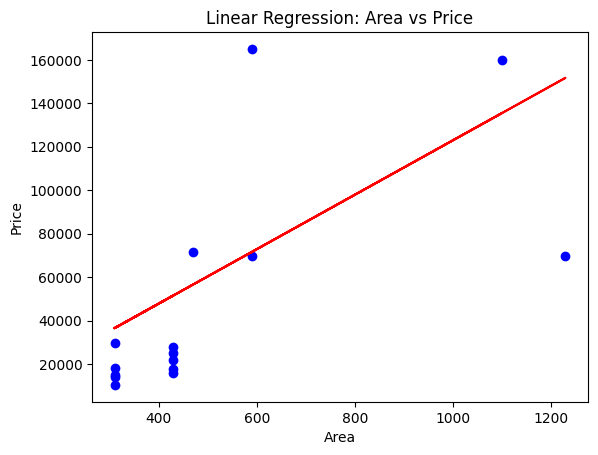

In [53]:
plt.scatter(X_test.values, y_test, color='blue')
plt.plot(X_test.values, y_pred, color='red')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Linear Regression: Area vs Price")
plt.show()